In [2]:
import tensorflow
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_array = cv2.imread("Driver Drowsiness Dataset (DDD)/Drowsy/s0001_00014_0_0_0_0_0_01.png" , cv2.IMREAD_GRAYSCALE)

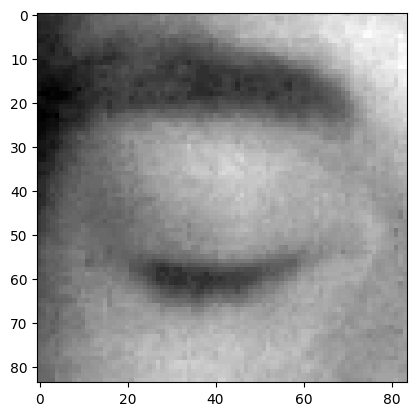

In [4]:
plt.imshow(img_array , cmap="gray")

In [5]:
img_array.shape

(84, 84)

Processing category: Drowsy
Reading: Driver Drowsiness Dataset (DDD)/Drowsy\s0001_00004_0_0_0_0_0_01.png


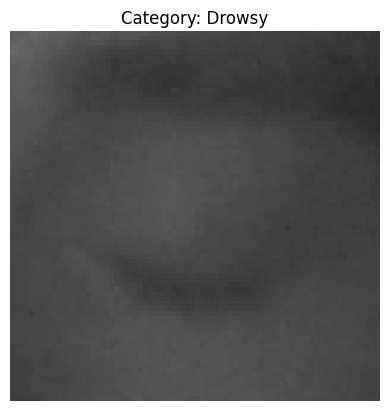

In [6]:
Datadirectory = "Driver Drowsiness Dataset (DDD)/"
Classes = ["Drowsy", "Non Drowsy"]

for category in Classes:
    path = os.path.join(Datadirectory, category)
    print(f"Processing category: {category}")
    
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        
        # Check if file is a valid image
        if img.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            print(f"Reading: {img_path}")
            img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            
            if img_array is None:
                print(f"Failed to read image: {img_path}")
                continue
            
            # Convert grayscale to RGB
            backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
            plt.imshow(backtorgb)
            plt.title(f"Category: {category}")
            plt.axis("off")
            plt.show()
            break  # Remove this if you want to process all images
        else:
            print(f"Skipped non-image file: {img}")
    break  # Remove this if you want to process all categories


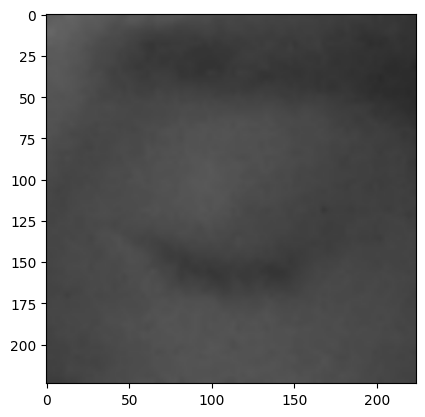

In [7]:
img_size = 224
new_array= cv2.resize(backtorgb,(img_size, img_size))
plt.imshow(new_array,cmap="gray")
plt.show()

In [8]:
# training_Data = []
# def create_training_Data(): 
#     for category in Classes:
#         path = os.path.join(Datadirectory,category)
#         class_num = Classes.index(category) ## 0 1,
#         for img in os.listdir(path):
#             try:
#                 img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GAYSCALE)
#                 Backtorg = cv2.cvtColor(img_array,cv2.COLOR_GAYSCALE)
#                 new_array= cv2.resize(backtorgb, (img_size, img_size))
#                 training_Data.append([new_array,class_num])
#             except Exception as e:
#                 pass

training_Data = []

def create_training_Data(): 
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)  # Class index (0, 1, ...)
        for img in os.listdir(path):
            try:
                # Fixed IMREAD_GAYSCALE to IMREAD_GRAYSCALE
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                
                # Fixed COLOR_GAYSCALE to COLOR_GRAY2RGB
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                
                # Resize image to desired dimensions
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                
                # Append image and label to the training data
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [9]:
create_training_Data()

In [10]:
print(len(training_Data))

12650


In [11]:
import random
random.shuffle(training_Data)

In [12]:
X = []
y = []
for features, label in training_Data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [13]:
X.shape

(12650, 224, 224, 3)

In [14]:
X= X/255.0;

In [15]:
Y= np.array(y)

In [16]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out )
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

KeyboardInterrupt: 

In [16]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
model = tf.keras.applications.mobilenet.MobileNet()

In [ ]:
model.summary()

In [20]:
base_input = model.input

In [ ]:
print((model.layers[0].input))

In [22]:
base_output = model.layers[-4].output

In [23]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [24]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [ ]:
new_model.summary()

In [ ]:
new_model.compile (loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
new_model.fit(X,Y, epochs = 1,validation_split = 0.1)

In [7]:
new_model.save('my_model.keras')

In [14]:
from tensorflow.keras.models import load_model 
new_model = load_model('my_model.keras')

In [15]:
img_array = cv2.imread('Driver Drowsiness Dataset (DDD)/Non Drowsy/s0001_03087_0_1_1_2_0_01.png', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [16]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [17]:
X_input.shape

(1, 224, 224, 3)

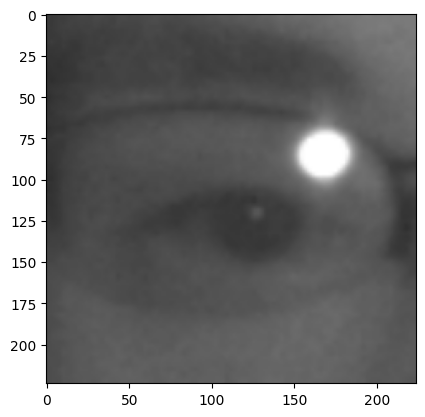

In [18]:
plt.imshow(new_array)

In [19]:
X_input = X_input/255.0

In [20]:
prediction = new_model.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step


In [21]:
prediction

array([[0.9998946]], dtype=float32)

In [22]:
# import os
# from tensorflow.keras.models import load_model 
# model_path = 'my_model.keras'  # Replace with your model file path
# model = load_model(model_path)

# # Set the folder containing the images
# image_folder = 'Driver Drowsiness Dataset (DDD)/Drowsy/'  # Replace with the folder path

# # Initialize variables to calculate the average prediction
# predictions = []

# # Iterate through all images in the folder
# for filename in os.listdir(image_folder):
#     if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Supported image formats
#         image_path = os.path.join(image_folder, filename)

#         # Read and preprocess the image
#         image = cv2.imread(image_path)
#         if image is None:
#             print(f"Warning: Unable to read {filename}")
#             continue

#         # Resize the image to the input size expected by the model
#         resized_image = cv2.resize(image, (224, 224))  # Replace (224, 224) with your model's input size
#         normalized_image = resized_image / 255.0  # Normalize pixel values
#         input_image = np.expand_dims(normalized_image, axis=0)  # Add batch dimension

#         # Predict using the model
#         prediction = model.predict(input_image)
        
#         # Assuming model.predict returns a single value per image
#         predictions.append(prediction[0][0])  # Extract the scalar value

#         print(f"Processed {filename}: Prediction = {prediction[0][0]}")

# # Calculate the average prediction value
# print("\nAll images end.")
# if predictions:
#     print("\nAll images processed.")
#     average_prediction = np.mean(predictions)
#     print(f"\nAverage Prediction Value: {average_prediction}")
# else:
#     print("No valid images found in the folder.")


In [23]:
img = cv2.imread('sa.png')

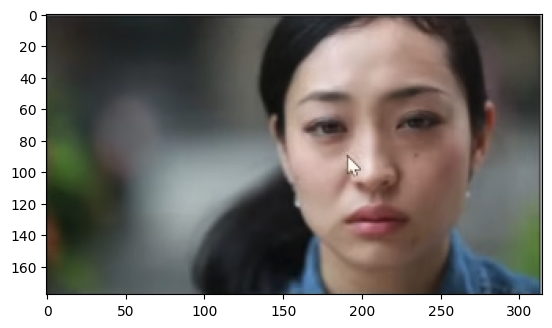

In [24]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [25]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [26]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')

In [27]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [28]:
eyes= eye_cascade.detectMultiScale(gray,1.1,4)

In [29]:
for(x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y) , (x+w , y+h) , (0 , 255 , 0) , 2)

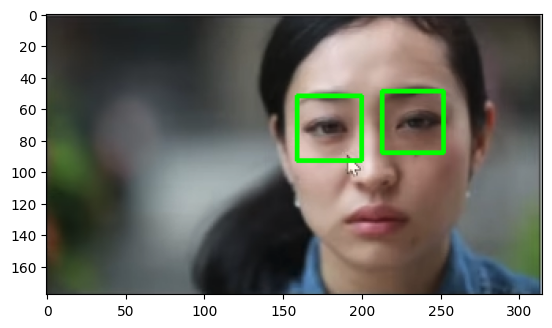

In [30]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Cropping Eye Image

In [31]:
import cv2
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes= eye_cascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in eyes:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  eyess= eye_cascade.detectMultiScale(roi_gray)
  if(len(eyess))==0:
    print("eyes are not  detected")
  else:
    for(ex,ey,ew,eh) in eyess:
      eyes_roi=roi_color[ey: ey+eh, ex:ex+ew]

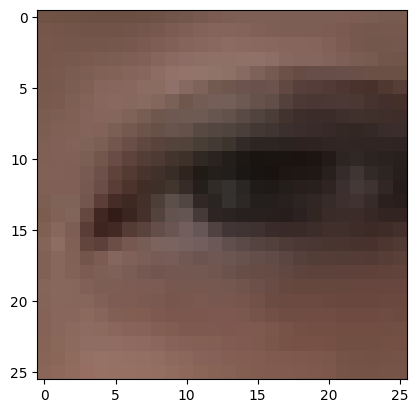

In [32]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [33]:
eyes_roi.shape

(26, 26, 3)

In [34]:
final_image= cv2.resize(eyes_roi, (224,224))
final_image= np.expand_dims(final_image,axis=0)
final_image= final_image/255.0

In [35]:
final_image.shape

(1, 224, 224, 3)

In [36]:
new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


array([[0.9999403]], dtype=float32)

In [23]:
import cv2 ### pip install opencv-python
import tensorflow as tf
# Load pre-trained models
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
new_model = tf.keras.models.load_model('my_model.keras')  # Replace with your model path

# Initialize webcam
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture frame")
        continue

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)

    status = "Closed Eyes"
    eyes_roi = None

    for (x, y, w, h) in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes not detected")
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]
                
                if eyes_roi is None or eyes_roi.size == 0:
                    print("Empty eyes ROI, skipping...")
                    continue

                # Preprocess eyes ROI
                final_image = cv2.resize(eyes_roi, (224, 224))
                final_image = np.expand_dims(final_image, axis=0)  # Add batch dimension
                final_image = final_image / 255.0  # Normalize

                # Make prediction
                Predictions = new_model.predict(final_image)
                print(Predictions)

                if 0.4 < Predictions[0][0] <= 0.9999:
                    status = "Open Eyes"
                else:
                    status = "Closed Eyes"

    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    
    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Add text to the frame
    font = cv2.FONT_HERSHEY_SIMPLEX
    if status == "Closed Eyes":
        cv2.putText(frame, status, (50, 50), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        
    else:
        cv2.putText(frame, status, (50, 50), font, 3, (0, 255, 0), 2, cv2.LINE_4)

    
    
    cv2.imshow('Drowsiness Detection Tutorial', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
[[0.40429685]]
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[0.9035092]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[0.7512361]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[0.8281887]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[0.7537401]]
Eyes not detected
Eyes not detected
Eyes not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[0.7849039]]
Eyes not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[0.527169]]
Eyes not detected
Eyes not detected
Eyes not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[0.38211927]]
Eyes not detected
Eyes not detected
Eyes not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[0.6462418]]
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
Eyes not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
[[0.66121936]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[0.552

KeyboardInterrupt: 

In [1]:
import pygame
import cv2 ### pip install opencv-python
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# Initialize pygame for sound
pygame.mixer.init()
pygame.mixer.music.load('alarm.wav')

def play_alarm():
    pygame.mixer.music.play()
    while pygame.mixer.music.get_busy():
        pygame.time.Clock().tick(10)

counter = 0
eyesdetected = 0
eyespresent = False
cap = cv2.VideoCapture(0)
# Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)

    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
            eyesdetected+=1
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]

    if eyesdetected == 0:
        final_image = cv2.resize(eyes_roi, (224,224))
        final_image = np.expand_dims(final_image,axis=0) ## need fourth dimension
        final_image = final_image/255.0

        Predictions = new_model.predict(final_image)
        print(Predictions)
        if (Predictions[0][0]>0.3 and Predictions[0][0]<0.888888):
            status = "Open Eyes"
            eyesdetected = 0
            eyespresent = True
            counter -=1
            eyesdetected =1
        else:
            status = "Closed Eyes"
            counter += 1
            if counter > 5:
                play_alarm()
                counter = 0
    elif(eyesdetected > 5 and eyespresent == True):
        counter +=1 
        status = "Closed Eyes"
        eyesdetected = 0
        if counter > 5:
                play_alarm()
                counter = 0
    elif(not eyespresent):
        status = "Face Not Detected"
        eyesdetected = 0

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray,1.1,4)

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Add text to the frame
    font = cv2.FONT_HERSHEY_SIMPLEX
    if status == "Closed Eyes":
        cv2.putText(frame, status, (50, 50), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        
    elif status == "Face Not Detected":
        cv2.putText(frame, status, (50, 50), font, 3, (0, 0, 255), 2, cv2.LINE_4)

    else:
        cv2.putText(frame, status, (50, 50), font, 3, (0, 255, 0), 2, cv2.LINE_4)
        
    cv2.imshow('Drowsiness Detection Tutorial', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

pygame 2.6.1 (SDL 2.28.4, Python 3.11.3)
Hello from the pygame community. https://www.pygame.org/contribute.html
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected
eyes are not detected


NameError: name 'np' is not defined

In [ ]:
# !pip install pygame

In [3]:
import winsound
import cv2 ### pip install opencv-python
frequency = 2500  
duration = 1000   
import numpy as np
import cv2 ### pip install opencv-python
### pip install opencv-contrib-python fullpackage
#from deepface import DeepFace ### pip install deepface
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
# Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
counter = 0
while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # print(faceCascade.empty())
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)

    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) == 0:
            print("eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyes:
                eyes_roi = roi_color[ey: ey+eh, ex: ex + ew]

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    font = cv2.FONT_HERSHEY_SIMPLEX

    # Use putText() method for inserting text on video
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image, axis=0)  ## need fourth dimension
    final_image = final_image / 255.0

    Predictions = new_model.predict(final_image)
    if (Predictions[0][0] > 0.3 and Predictions[0][0] <= 0.99999999999):
        status = "Open Eyes"
        cv2.putText(frame,
                    status,
                    (150, 150),
                    font, 3,
                    (0, 255, 0),
                    2,
                    cv2.LINE_AA)
        x1, y1, w1, h1 = 0, 0, 175, 75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        # Add text
        cv2.putText(frame, "Active", (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        print(Predictions[0][0])
    else:
        counter = counter + 1
        status = "Closed Eyes"
        cv2.putText(frame,
                    status,
                    (150, 150),
                    font, 3,
                    (0, 0, 255),
                    2,
                    cv2.LINE_AA)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
        print(Predictions[0][0],"eyes are closed")
        if counter>5:
          x1,y1,w1,h1 = 0,0,175,75
          cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
          cv2.putText(frame, "Sleep Alert!", (x1 + int(w1 / 10), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
          winsound.Beep(frequency, duration)
          counter = 0
          winsound.Beep(frequency, duration)
          counter=0
    cv2.imshow('Drowsiness Detection Tutorial', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

NameError: name 'new_model' is not defined

In [ ]:
!pip install playsound

In [5]:
import cv2
import numpy as np
from playsound import playsound  # Install via pip install playsound

# Load Haar cascades
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')

# Initialize video capture
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

counter = 0

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect eyes
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    for x, y, w, h in eyes:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Detect faces
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Assuming eyes_roi is obtained from detected eyes
    if len(eyes) > 0:
        for (ex, ey, ew, eh) in eyes:
            eyes_roi = roi_color[ey: ey + eh, ex: ex + ew]
            if eyes_roi is None or eyes_roi.size == 0:
                print("Empty eyes ROI, skipping...")
                continue
        final_image = cv2.resize(eyes_roi, (224, 224))
        final_image = np.expand_dims(final_image, axis=0)
        final_image = final_image / 255.0

        # Dummy prediction logic
        # Replace new_model.predict with your actual model inference
        Predictions = new_model.predict(final_image)
        # print(Predictions) 
        if Predictions > 0.3 and Predictions <= 0.99999999999:
            status = "Open Eyes"
            cv2.putText(frame, status, (150, 150), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 2, cv2.LINE_AA)
            counter = 0
        else:
            counter += 1
            status = "Closed Eyes"
            cv2.putText(frame, status, (150, 150), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 255), 2, cv2.LINE_AA)
            if counter > 5:
                x1, y1, w1, h1 = 0, 0, 175, 75
                cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
                cv2.putText(frame, "Sleep Alert!", (x1 + int(w1 / 10), y1 + int(h1 / 2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                playsound('alert.wav')  # Replace 'alert.wav' with your .wav file path
                counter = 0
        print(Predictions, status)
    cv2.imshow('Drowsiness Detection', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Empty eyes ROI, skipping...
Empty eyes ROI, skipping...


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


: 

* Extracting the eyes from face once more using Mediapipe

In [35]:
!pip install --user mediapipe

In [44]:
import sys
!{sys.executable} -m pip install mediapipe




ModuleNotFoundError: No module named 'mediapipe'

: 

# Fine Tunning

In [17]:
from tensorflow.keras.models import load_model

# Load the existing model
model = load_model('fine_tuned_model.keras')


In [22]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

# Freeze all layers except the last ones (optional)
for layer in model.layers[:-3]:
    layer.trainable = False

# Add new layers for fine-tuning
x = model.layers[-2].output
new_output = Dense(2, activation='softmax')(x)  # 2 classes: Open_Eyes, Closed_Eyes
model = Model(inputs=model.input, outputs=new_output)


In [23]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-2),  # Fine-tuning often uses a smaller learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training and validation data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0, rotation_range=20, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    'FineTunning',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)




Found 797 images belonging to 2 classes.


In [25]:
history = model.fit(
    train_generator,
    epochs=10,  # Adjust epochs as needed
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    
)


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 25s 817ms/step - accuracy: 0.8870 - loss: 0.3357
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0267
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 24s 982ms/step - accuracy: 0.9921 - loss: 0.0299
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 420us/step - accuracy: 1.0000 - loss: 0.0029 
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 703ms/step - accuracy: 0.9950 - loss: 0.0135
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 515us/step - accuracy: 1.0000 - loss: 0.0040 
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 652ms/step - accuracy: 0.9988 - loss: 0.0053
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - accuracy: 1.0000 - loss: 0.0018 
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 838ms/step - accuracy: 0.9998 - loss: 0.0025
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 506us/step - accuracy: 1.0000 - loss: 3.4650e-04 


In [26]:
model.save('fine_tuned_model.keras')


In [27]:
test_generator = validation_datagen.flow_from_directory(
    'FineTunning',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Found 797 images belonging to 2 classes.
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 296ms/step - accuracy: 1.0000 - loss: 0.0021
Test Accuracy: 100.00%


# Testing Of Finetuned Model

In [28]:
validation_generator = validation_datagen.flow_from_directory(
    'Validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1145 images belonging to 2 classes.


In [29]:
history = model.fit(
    train_generator,
    epochs=10,  # Adjust epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.1098 - val_loss: 10.2199
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.1080 - val_loss: 11.6476
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.1063 - val_loss: 11.3281
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.1063 - val_loss: 10.2416
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 1.0000 - loss: 6.3261e-04 - val_accuracy: 0.1080 - val_loss: 10.7545
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.1080 - val_loss: 9.8803
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 1.0000 - loss: 6.3580e-04 - val_accuracy: 0.1107 - val_loss: 11.5759
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 1.0000 - loss: 8.3592e-04 - val_accuracy: 

In [32]:
from tensorflow.keras.models import load_model 
new_model = load_model('fine_tuned_model.keras')
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000   # Set Duration To 1000 ms == 1 second
import numpy as np
import cv2 

path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
# Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
counter = 0
while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # print(faceCascade.empty())
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)

    eyes_roi = None  # Initialize as None
    for x, y, w, h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyes_detected = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes_detected) > 0:
            for (ex, ey, ew, eh) in eyes_detected:
                eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]  # Assign only if detected
                break  # Take the first detected eye region

    if eyes_roi is not None:
        # Proceed only if eyes_roi is available
        final_image = cv2.resize(eyes_roi, (224, 224))
        final_image = np.expand_dims(final_image, axis=0)  # Add batch dimension
        final_image = final_image / 255.0  # Normalize the image

        Predictions = new_model.predict(final_image)
        print(Predictions[0][0])
        if Predictions[0][0] > 0.5:
            status = "Open Eyes"
            cv2.putText(frame,
                        status,
                        (150, 150),
                        font, 3,
                        (0, 255, 0),
                        2,
                        cv2.LINE_AA)
            x1, y1, w1, h1 = 0, 0, 175, 75
            cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
            cv2.putText(frame, "Active", (x1 + int(w1 / 10), y1 + int(h1 / 2)), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        else:
            counter += 1
            status = "Closed Eyes"
            cv2.putText(frame,
                        status,
                        (150, 150),
                        font, 3,
                        (0, 0, 255),
                        2,
                        cv2.LINE_AA)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
            if counter > 5:
                x1, y1, w1, h1 = 0, 0, 175, 75
                cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
                cv2.putText(frame, "Sleep Alert!", (x1 + int(w1 / 10), y1 + int(h1 / 2)), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                winsound.Beep(frequency, duration)
                counter = 0
    else:
        # No eyes detected, reset or display appropriate feedback
        cv2.putText(frame, "No Eyes Detected", (150, 150), font, 1, (0, 255, 255), 2)

    cv2.imshow('Drowsiness Detection Tutorial', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
0.99999654
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
0.9999999
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
0.9999999
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
0.99999976
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
0.9999999
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
0.9999999
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
0.9999999
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
0.9999994
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
0.9999999
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
0.9999987
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
0.9999999
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms

KeyboardInterrupt: 

In [33]:


import cv2
import mediapipe as mp
import numpy as np
import winsound
import tensorflow as tf

# Initialize Mediapipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1, refine_landmarks=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Define beep parameters
frequency = 2500
duration = 1000

# Load your pre-trained model
new_model = tf.keras.models.load_model('fine_tuned_model.keras')  # Replace with your model path

# Initialize variables
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

counter = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to RGB (required by Mediapipe)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb_frame)

    status = "Face Not Detected"

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            # Extract eye landmarks (use indices from Mediapipe Face Mesh)
            left_eye_indices = [33, 160, 158, 133, 153, 144]
            right_eye_indices = [362, 385, 387, 263, 373, 380]

            h, w, _ = frame.shape

            # Get bounding boxes for left and right eyes
            left_eye = [(int(face_landmarks.landmark[i].x * w), int(face_landmarks.landmark[i].y * h)) for i in left_eye_indices]
            right_eye = [(int(face_landmarks.landmark[i].x * w), int(face_landmarks.landmark[i].y * h)) for i in right_eye_indices]

            # Draw eye regions on the frame
            for point in left_eye + right_eye:
                cv2.circle(frame, point, 2, (0, 255, 0), -1)

            # Crop eye regions
            x_min_left = min([p[0] for p in left_eye])
            y_min_left = min([p[1] for p in left_eye])
            x_max_left = max([p[0] for p in left_eye])
            y_max_left = max([p[1] for p in left_eye])

            x_min_right = min([p[0] for p in right_eye])
            y_min_right = min([p[1] for p in right_eye])
            x_max_right = max([p[0] for p in right_eye])
            y_max_right = max([p[1] for p in right_eye])

            left_eye_roi = frame[y_min_left:y_max_left, x_min_left:x_max_left]
            right_eye_roi = frame[y_min_right:y_max_right, x_min_right:x_max_right]

            # Preprocess eye regions for the model
            eyes_roi = [left_eye_roi, right_eye_roi]

            for eye_roi in eyes_roi:
                if eye_roi.size > 0:
                    final_image = cv2.resize(eye_roi, (224, 224))
                    final_image = np.expand_dims(final_image, axis=0)
                    final_image = final_image / 255.0

                    # Predict eye status
                    Predictions = new_model.predict(final_image)
                    
                    if Predictions[0][0] > 0.8:
                        status = "Open Eyes"
                        counter = max(0, counter - 1)
                    else:
                        counter += 1
                        status = "Closed Eyes"

    # Trigger alarm if eyes are closed for too long
    if counter > 5:
        status = "Sleep Alert!"
        winsound.Beep(frequency, duration)
        counter = 0

    print(status,Predictions[0][0])
    # Display status on frame
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, status, (50, 50), font, 1, (0, 0, 255) if "Closed" in status else (0, 255, 0), 2)

    # Show the frame
    cv2.imshow('Drowsiness Detection', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



ImportError: DLL load failed while importing _framework_bindings: A dynamic link library (DLL) initialization routine failed.

: 